In [1]:
%pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.datasets import fetch_california_housing

### Style set for matplot and seaborn

In [3]:
plt.style.use('default')
sea.set_palette('husl')

In [4]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

df['MedHouseVal'] = data.target
df['MedHouseVal']


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

## Making a plot for the entire dataset with all the attributes 

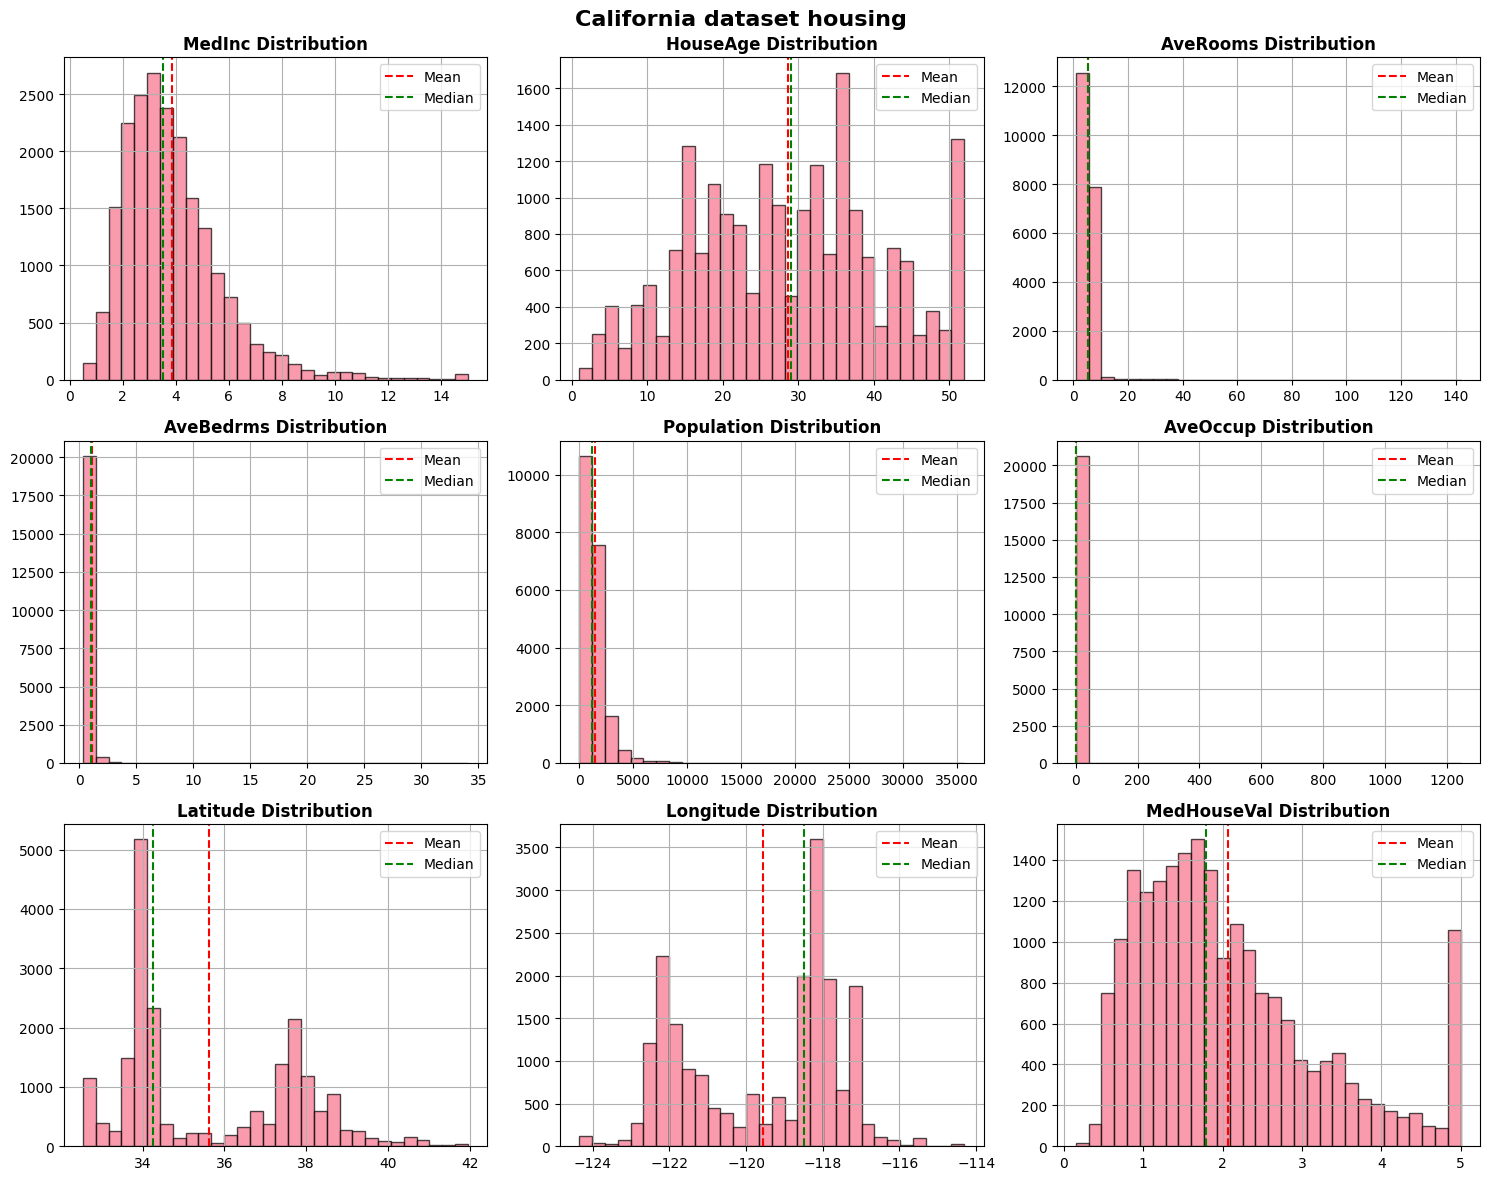

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(15,12))
axes = axes.flatten()

for i,col in enumerate(df.columns):
            ax = axes[i]
            df[col].hist(bins=30, ax=ax, alpha=0.7, edgecolor='black')
            ax.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
            ax.axvline(df[col].median(), color='green', linestyle='--', label='Median')
            ax.set_title(f'{col} Distribution', fontweight='bold')
            ax.legend()
plt.suptitle('California dataset housing ', fontsize='16', fontweight='bold')
plt.savefig('hisogram.png', dpi=200, bbox_inches="tight")
plt.tight_layout()
plt.show()

## Make the BoxPlots

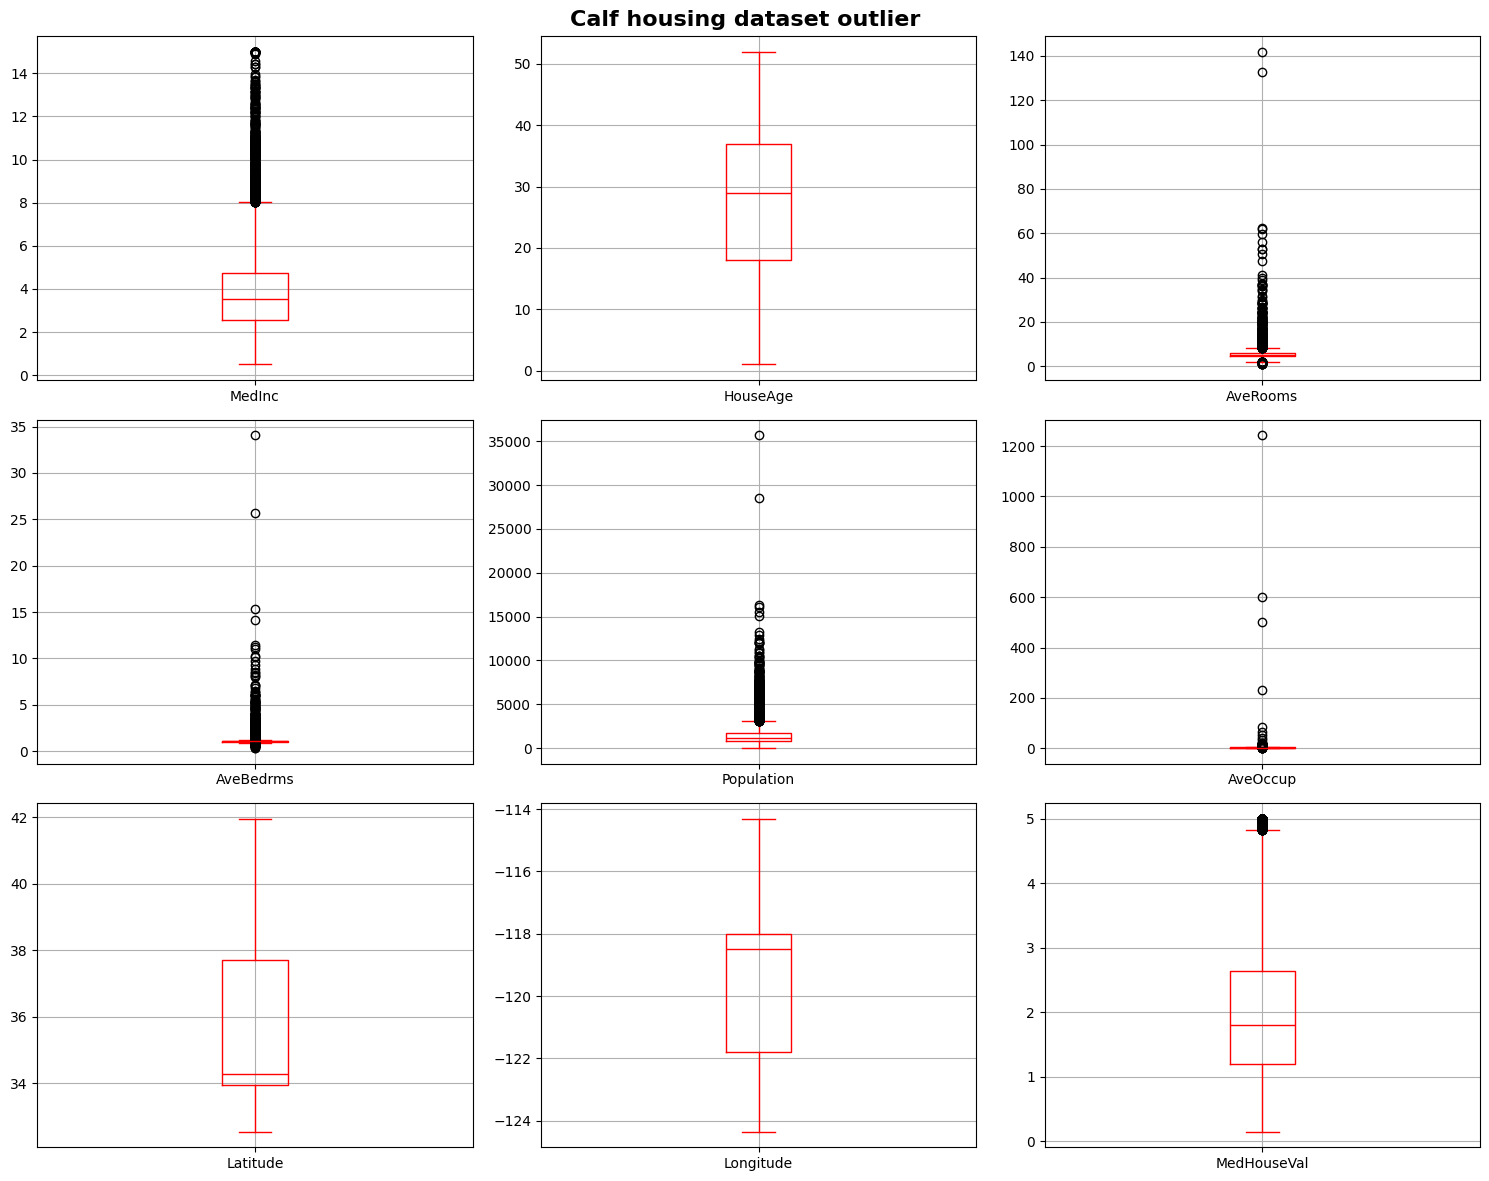

In [6]:
fig1, axes1 = plt.subplots(3,3,figsize = (15,12))
axes1 = axes1.flatten()

outlier_info = {}

for i,col in enumerate(df.columns):
            ax1 = axes1[i] 
            df.boxplot(column=col, ax=ax1, color='red')
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3- Q1

            outliers = df[(df[col]<(Q1-1.5*IQR)) | (df[col]<(Q3 - 1.5*IQR))]

            outlier_info[col] = {
                    'count': len(outliers),
                    'percentage': len(outliers)/ len(df) * 100
            }

            ax.set_title(f"{col} - {len(outliers)} outliers ({outlier_info[col]["percentage"]: 1f}%)", fontweight='bold')

plt.suptitle('Calf housing dataset outlier', fontsize=16, fontweight='bold')
plt.savefig('boxplot.png', dpi=200, bbox_inches="tight")
plt.tight_layout()
plt.show() 

In [7]:
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

print("\nStructure: ", df.describe)

Dataset shape: (20640, 9)

Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

Structure:  <bound method NDFrame.describe of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
206